<a href="https://colab.research.google.com/github/JohannesMRS/TipeKaca/blob/main/projectGDG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding and Preprocesing Data

## Langkah Pertama: Unload data

disini kita sudah memiliki dataset kaca yang sudah kita ambil dari kaggle, dataset ini memiliki beberapa kolom yang isinya adalah berat dan persentase kandungan sebuah elemen yang terdapat dalam kaca, dan jenis kaca itu sendiri.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#mengimport library yang diperlukan
import pandas as pd
import numpy as np


In [10]:
#membaca dataset kaca ke sebuah dataframe
df = pd.read_csv('/content/drive/My Drive/dataset/glass.csv')

In [59]:
#menampilkan dataframe
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Langka Kedua: Preprocessing data

Kita akan mengelola data, sembari mengenali dan memahami data yang kita kerjakan

In [12]:
#Mengetahui berapa banyak baris dan kolom yang ada di dataset glass.csv
df.shape

(214, 10)

In [13]:
#Melihat informasi yang ada seputar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


disini ada satu kolom yang memiliki tipe data yang berbeda yaitu kolom 9

In [14]:
#mencari data yang hilang
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


kita lihat disini bahwa tidak ada data yang hilang

In [15]:
#menampilkan dimana data yang hilang
df[df['Type'].isnull()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


dikarenakan tidak ada data yang kosong, maka kita masuk ke langkah selanjutnya yaitu mengelola data yang duplikat

In [16]:
#melihat ada berapa banyak data yang duplikat
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


dapat kita lihat bahwa ada satu data duplikat, kita bisa menghapus data tersebut

In [17]:
#menghapus data duplikat
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [18]:
#melihat data statistik dari dataset kaca
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


bisa kita lihat, data diatas semua berada di count 213, yang artinya sudah tidak ada impunitas atau data yang hilang. Langkah selanjutnya kita akan mengelola outliers. Outliers adalah data anomali, yang data nya jauh dari pola yang ada. Data ini biasanya bisa merusak model karena ia akan mengubah seluruh perhitungan matematika dari sebuah model. Cara handle outliers biasanya menggunakan visualisasi contohnya boxplot. setelah melakukan visualiasi dan memahami, outliers dapat di handle misal dengan metode IQR

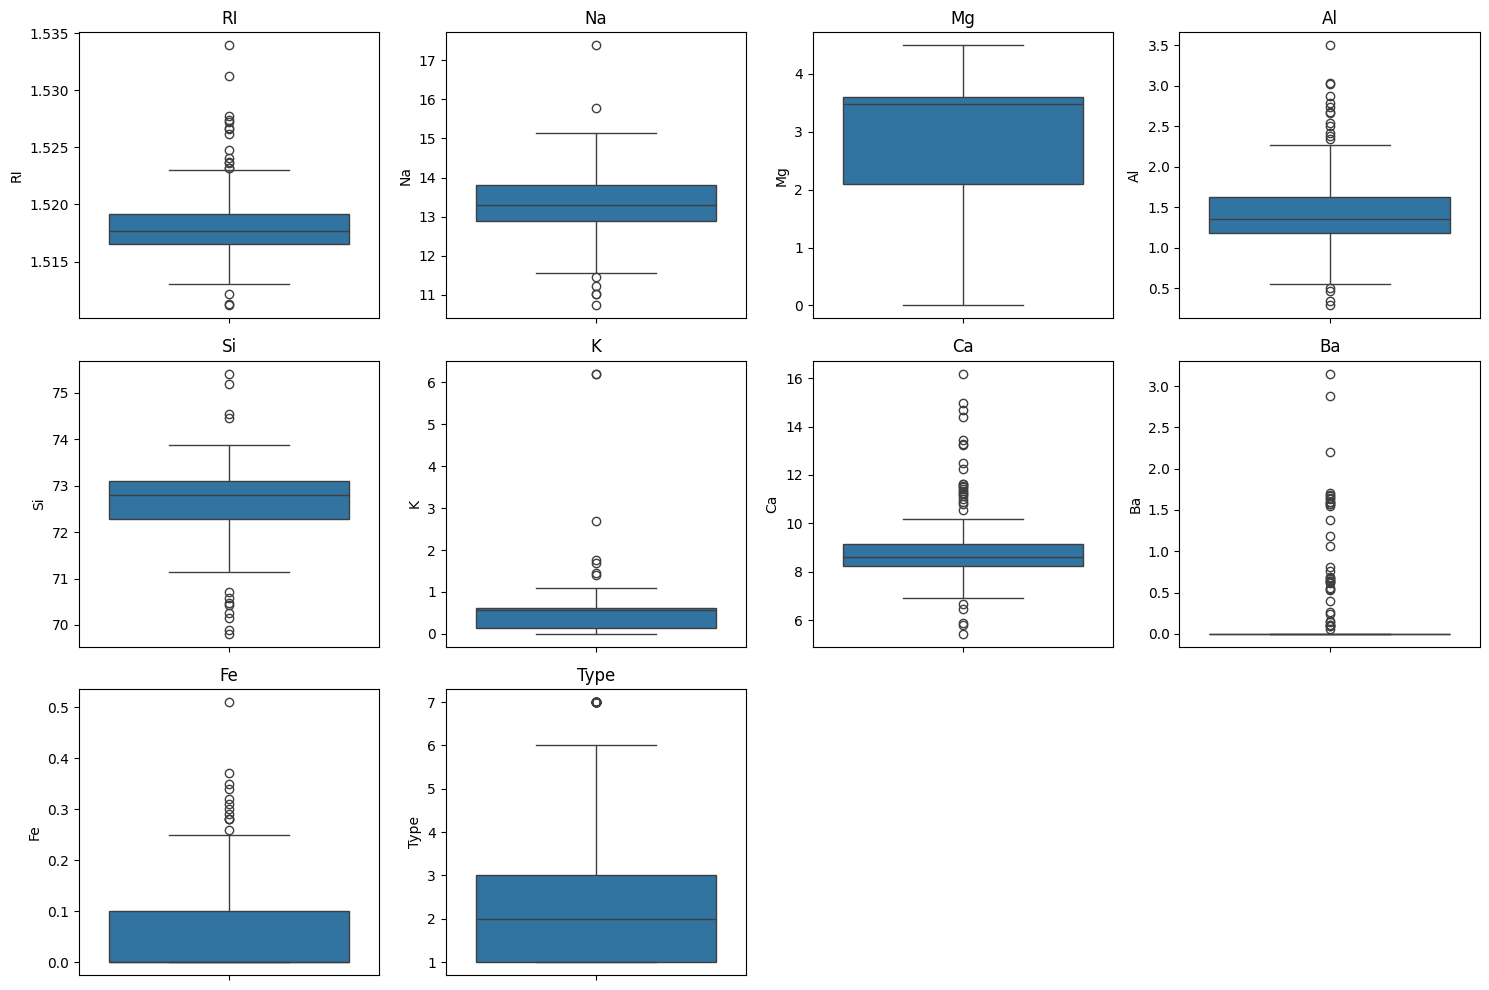

In [19]:
#melakukan visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi semua outliers
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.columns):
  plt.subplot(3, 4, i+1)
  sns.boxplot(y=df[col])
  plt.title(col)
  plt.tight_layout()
plt.show()

In [20]:
#Desicion: Mengelola atau menghapus data outliers atau kita menggunakan IQR
#Final Desicion: Tidak mengelola atau menghapus data outliers

## Langkah Ketiga: Eksplore lebih dan visualisasi, proses lebih

menggunakan library yang sudah ada kita gunakan sebelumnya untuk membuat boxplot, kita akan mencoba mamahami lebih lanjut mengenai data dengan menggunakan visualisasi data

Visualisasi data adalah metode untuk memberikan gambaran visual terkait data kita. Visualisasi data dapat dilakukan dengan beberapa metode, mulai dari plotting, membuat graph, hinggga heatmap. Metode ini ditentukan dengan kebutuhan pemahaman pengguna

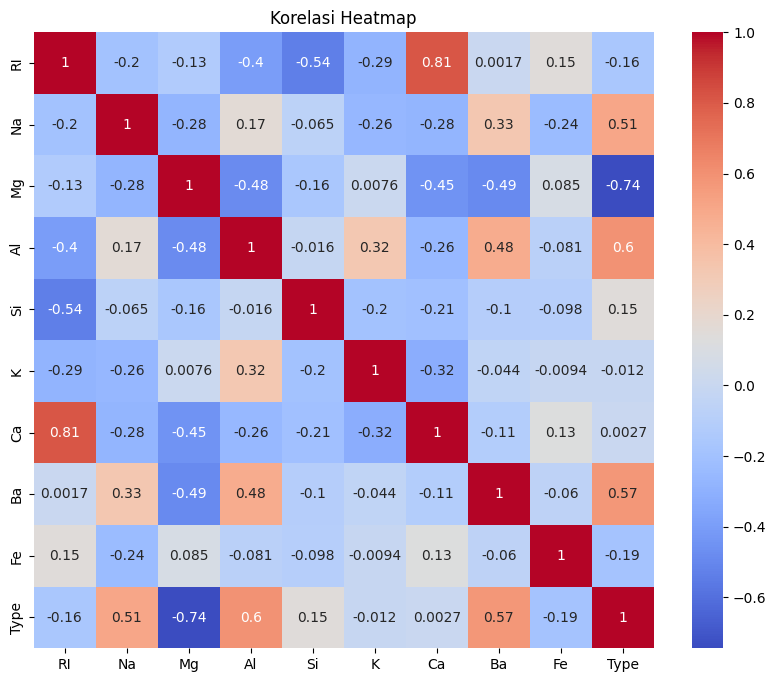

In [21]:
# Saya ingin mengetahui seberapa berpengaruh sebuah elemen, misal besi (Fe), dan lain-lain terhadap jenis kaca
# Menggunakan visualisasi korelasi heatmap

# Membuat visualisasi korelasi heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap ='coolwarm')
plt.title('Korelasi Heatmap')
plt.show()

dari visualisasi diatas kita bisa lihat bahwa semakin besar angka yang ada pada kolom 'Type', semakin berpengaruh kolomnya ke tipe dari kacanya, nah bisa kita lihat juga, Barium, Magnesium, Natrium, Aluminium sangat berpengaruh terhadap tipe dari kaca nya

/tmp/ipython-input-1930519097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=df, palette = "bright")


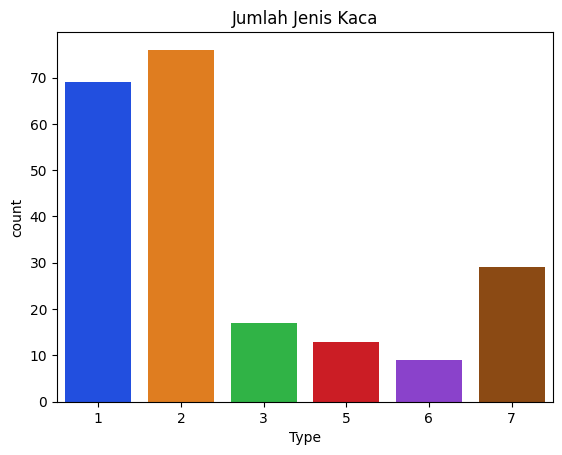

In [22]:
sns.countplot(x="Type", data=df, palette = "bright")
plt.title('Jumlah Jenis Kaca')
plt.show()

Bisa kita lihat bahwa data kaca bertipe 1 dan 2 lebih banyak dari data kaca bertipe 5 dan 6. Ini merupakan situasi yang buruk, karena tipe kaca 1 dan 2 akan lebih dominan dari tipe kaca lainnya, sehingga ketika kita test modelnya nanti, hasil yang sering keluar adalah tipe kaca 1 dan 2

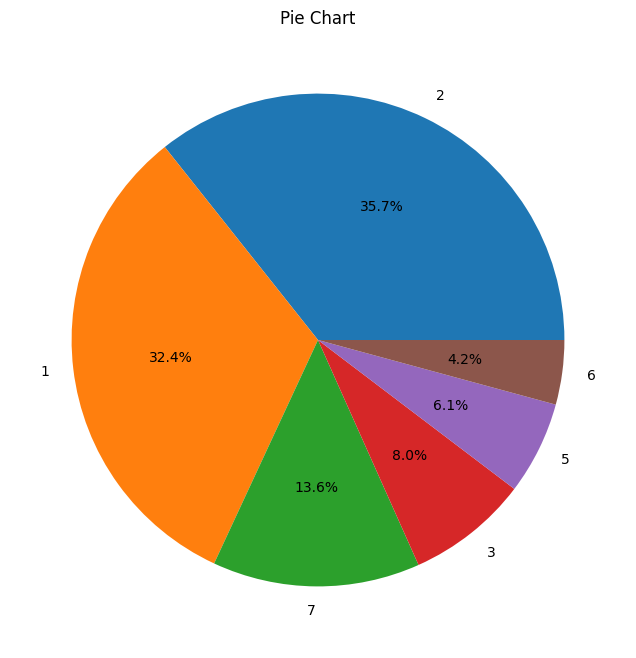

In [23]:
# Visualisasi menggunakan pie chart

plt.figure(figsize = (10, 8))
plt.pie(df['Type'].value_counts(), labels = df['Type'].value_counts().index, autopct = '%1.1f%%')
plt.title('Pie Chart')
plt.show()

Dari visualisasi diatas, bisa kita simpulkan bahwa jenis kaca 1 dan 2 meliputi setengah dari data yang ada

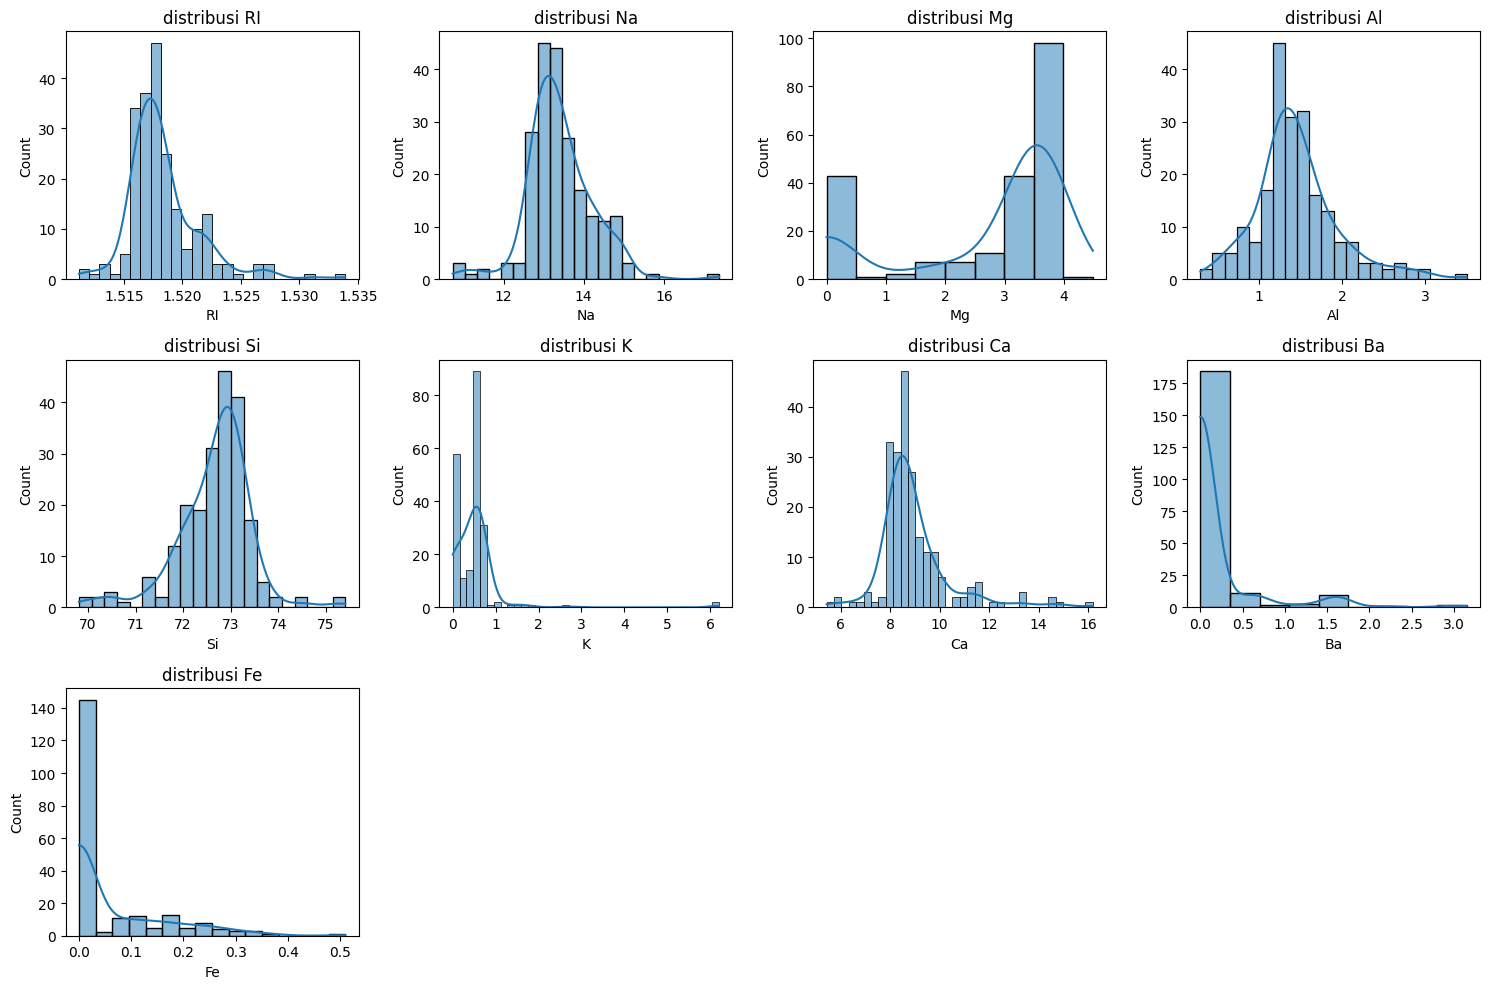

In [24]:
# disini saya ingin tahu bagaimana distribusi dari semua elemen yang ada, kecuali kolom type
plt.figure(figsize = (15, 10))
for i, col in enumerate(df.columns[:-1]):
  plt.subplot(3, 4, i+1)
  sns.histplot(df[col], kde = True)
  plt.title(f'distribusi {col}')
  plt.tight_layout()
plt.show()

Selanjutnya kita akan menentukan desicion apa yang harus kita buat, apakah kita akan menghapus sebagian data jenis kaca 1 dan 2, atau kita akan menambahkan data jenis kaca 5 dan 6

# Modelling and Testing

## Langkah Pertama: Memahami Model

Sebelum kita melakukan modelling, kita harus tau dulu apa yang akan kita modelkan. Disini kita akan melakukan modelling menggunakan konsep klasifikasi. Klasifikasi adalah proses pengelompokkan data ke dalam kategori atau kelas yang telah ditentukan sebelumnya berdasarkan fitur-fitur yanf ada pada data tersebut. Ini adalah jenis supervised learning dimana algoritma belajar dari data berlabel untuk memprediksi label dari data baru. Dalam data kita, kita punya data berlaber, yaitu kaca, dan kita akan mencoba memprediksi kaca tersebut dari fitur fitur lain seperti Na, Mgm dll.

## Langkah Kedua: Mengolah Ulang data

Kita akan melakukan splitting ke data kita, gunanya untuk memecah data, sehingga sebagian data digunakan untuk training model, dan sebagian lagi untuk testing model, data yang sudah dipakai untuk training model tidak bisa dipakai lagi untuk testing model, karena model sudah hapal dengan data yang di training ke model, sehingga akan memunculkan ke ambiguan

Setelahnya, karena data kita masih belum seimbang yang dimana data 1 dan 2 masih dominan dibanding data yang lain kita akan menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique) untuk menyeimbangkan datanya

In [26]:
#menyimpan seluruh baris dan kolom (fitur-fitur) selain kolom type ke variabel X
#Menyimpan kolom type ke variabel y

x = df.drop('Type', axis = 1)
y = df['Type']

Kita memisah type dari elemn lainnya karena kita hanya akan memahami si kolom type terlebih dahulu


In [28]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [31]:
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [32]:
#kita akan menggunakan suatu library untuk melakukan teknik SMOTE
from imblearn.over_sampling import SMOTE
smote  = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)

In [33]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      456 non-null    float64
 1   Na      456 non-null    float64
 2   Mg      456 non-null    float64
 3   Al      456 non-null    float64
 4   Si      456 non-null    float64
 5   K       456 non-null    float64
 6   Ca      456 non-null    float64
 7   Ba      456 non-null    float64
 8   Fe      456 non-null    float64
dtypes: float64(9)
memory usage: 32.2 KB


In [34]:
y_smote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 456 entries, 0 to 455
Series name: Type
Non-Null Count  Dtype
--------------  -----
456 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


disini semua elemen sudah seimbang di angka 456

In [42]:
#Memisahkan data untuk training dengan data untuk testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

## Langkah Ketiga: Modelling

Sekarang kita akan menggunakan beberapa model klasifikasi untuk modellingnya, kita akan menggunakan metode:

- Desicion Tree
- Random Forest
- K Nearest Neighbor
- Support Vector Machine



### Decision Tree

Decision tree merupakan metode analisis data yang strukturnya mirip seperti pohon, metode ini cara kerjanya ialah, memecah-mecah data berdasarkan aturan dan kondisi tertentu, dan akan menghasilkan hasil yang lebih spesifik. Metode ini bisa dipakai untuk model regresi ataupun model klasifikasi

In [60]:
# Membuat model menggunakan desicion tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [56]:
# Cek akurasi
dt_score = dt_model.score(x_test, y_test)
print("Akurasi model Decision Tree: ", dt_score)

Akurasi model Decision Tree:  0.8804347826086957


### Random Forest

Random Forest merupakan algoritma yang bekerja dengan menggabungkan beberapa decision tree dan menentukan hasil decision tree yang lebih akurat dan stabil, atau mengambil rata-rata dari seluruh decision tree yang ada. Algoritma ini tergolong sebagai ensemble learning atau metode yang melakukan penggabungan. Tiap-tiap decision tree itu dilatih dengan data yang berbeda dan fitur-fitur yang dipilih secara acak. Gabungan dari decision tree inilah yang disebut hutan keputusan

In [61]:
# Membuat model menggunakan random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [55]:
# Cek akurasi
rf_score = rf_model.score(x_test, y_test)
print("Akurasi model Random Forest: ", rf_score)

Akurasi model Random Forest:  0.9456521739130435


### K Nearest Neighbor

K Nearest Neighbor adalah metode untuk mengklasifikasikan atau memprediksi data baru berdasarkan kedekatannya dengan data latih yang sudah ada. Metode ini bekerja dengan menacari sebanyak K data latih terdekat dari data baru, dan data mengklasifikasikan data baru ini berdasarkan mayoritas kelas K tetangga terdekat tersebut

In [67]:
# Membuat model menggunakan k nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [68]:
# Cek akurasi
knn_score = knn_model.score(x_test, y_test)
print("Akurasi model menggunakan KNN: ", knn_score)

Akurasi model menggunakan KNN:  0.8586956521739131


### Support Vector Machine (SVM)

SVM adalah algoritma yang cara kerjanya ialah, menentukan garis pemisah terbaik antara dua kelompok data atau kelas

In [69]:
# Membuat model menggunakan SVM
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

In [71]:
# Cek Akurasi

svm_score = svm_model.score(x_test, y_test)
print("Akurasi model menggunakan SVM: ", svm_score)

Akurasi model menggunakan SVM:  0.10869565217391304


## Langkah Keempat: Evaluasi
Di bagian evaluasi ini kkita bisa mengetahui langkah apa selanjutnya. Misal kita bisa merubah parameter atau model selanjutnya. Evaluasi ini bisa dilakukan dengan banyak cara tidak hanya dengan melihat dengan akurasi saja. Ada beberapa metrik yang bisa kita jadikan perhitungan seperti F-1 score, dll

In [80]:
# melihat hasil akurasi dari setiap model

f_score = {
    'dt_score: ' : dt_score,
    'rf_score: ' : rf_score,
    'knn_score: ' : knn_score,
    'svm_score: ' : svm_score
    }
f_score

{'dt_score: ': 0.8804347826086957,
 'rf_score: ': 0.9456521739130435,
 'knn_score: ': 0.8586956521739131,
 'svm_score: ': 0.10869565217391304}

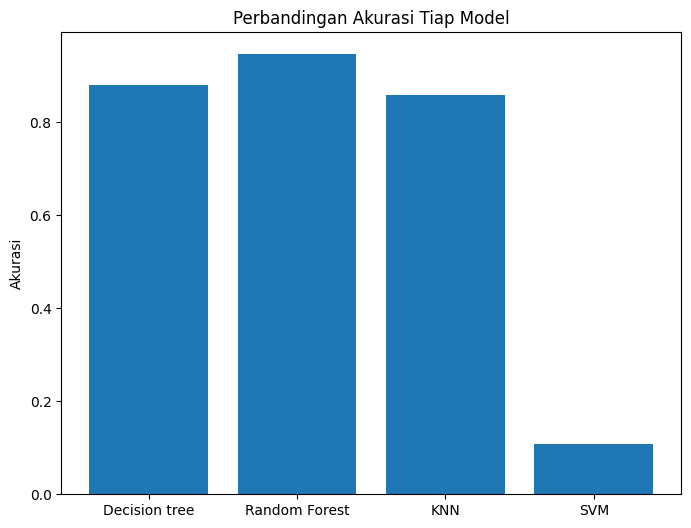

In [83]:
# Visualisasi menggunakan bar
plt.figure(figsize = (8, 6))
plt.bar(['Decision tree', 'Random Forest', 'KNN', 'SVM'], score)
plt.ylabel("Akurasi")
plt.title("Perbandingan Akurasi Tiap Model")
plt.show()

Dari perbandingan diatas bisa kita simpulkan bahwa metode random forest merupakan metode terbaik yang bisa kita pakai. Selanjutnya kita bisa ambil langkah apakah kita melakukan hyperparameter tunning atau menyudahi modelling nya dan mencoba mengimplementasikan modelnya. Disini karena kita sudah dapat akurasi 92+, maka kita bisa menyudahi modelling dan lanjut ke implementasinya. (angka akurasi yang dikatakan baik adalah dari 0,85-0,94 tidak kurang tidak lebih, jika kurang model akan kurang akurat, jika lebih model mungkin saja akan overfitting)

## Langkah Kelima (Opsional): Hyperparameter Tunning

Hyperparameter tunning adalah proses mencari kombinasi terbaik dari  hyperparameter suatu model machine learning untuk mencapai performa terbaik. nah hyperparameter tunning ini tidak dipelajari model selama proses pelatihan model

Karena metode Random Forest memiliki akurasi yang lebih tinggi dari metode lainnya. kita akan melakukan hyperparameter tunning ke random forest

In [88]:
# Melakukan hyperparameter tunning ke metode random forest
rf_model = RandomForestClassifier(n_estimators = 200, max_depth = 10, min_samples_split = 2)
rf_model.fit(x_train, y_train)

rf_score = rf_model.score(x_test, y_test)
print("Akurasi model Random Forest: ", rf_score)

Akurasi model Random Forest:  0.9456521739130435


In [90]:
# Melihat informasi klasifikasi
from sklearn.metrics import classification_report

y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        17
           2       1.00      0.84      0.91        19
           3       0.77      1.00      0.87        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        18

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.94        92
weighted avg       0.95      0.95      0.95        92



## Langkah Keenam: Implementasi

Kita akan coba implementasi model yang sudah kita buat menggunakan FastAPI. FastAPI adalah framework web python yang dirancang untuk membangun API (Apllication Programming Interface) dengan cepat dan efisien. Disini kita akan meload model menjadi file .pkl dan selanjutnya akan kita lanjut ke vscode

In [91]:
#Load model menggunakan pickle

import pickle
pickle.dump(rf_model, open('model.pkl', 'wb'))

In [92]:
x_smote.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [93]:
x_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      456 non-null    float64
 1   Na      456 non-null    float64
 2   Mg      456 non-null    float64
 3   Al      456 non-null    float64
 4   Si      456 non-null    float64
 5   K       456 non-null    float64
 6   Ca      456 non-null    float64
 7   Ba      456 non-null    float64
 8   Fe      456 non-null    float64
dtypes: float64(9)
memory usage: 32.2 KB
